# Analysis

get the locally saved data

In [2]:
import pickle
import pandas as pd
import os
import sys
import seaborn as sn
import matplotlib.pyplot as plt
import yaml

sys.path.append('/home/joel/projects/driftlon/analysis')
sys.path.append('/home/joel/projects/driftlon')
from correlation import *

In [3]:
X = pickle.load(open('../X.pkl', 'rb+'))
Y = pickle.load(open('../Y.pkl', 'rb+'))

In [3]:
len(X), len(Y)

(87303, 87303)

filter for the numeric fields

In [6]:
non_numerical_fields_path = './non_numeric_fields.yaml'

with open(non_numerical_fields_path, 'r') as file_:
    non_numerical_fields = yaml.load(file_.read(),  Loader=yaml.BaseLoader)

In [7]:
all_keys = get_all_keys(X)
common_keys = [x for x in get_common_keys(X) if x not in non_numerical_fields]
data_for_keys = get_data_for_keys(common_keys, X)

In [8]:
all_data = pd.DataFrame(data_for_keys).T.set_axis(common_keys, axis=1)
quant_indices = [common_keys[x[0]] for x in enumerate(all_data.loc[0,:]) if type(x[1])==int] 
data = pd.DataFrame(all_data.loc[:,quant_indices])
converted_data = data.apply(pd.to_numeric)

In [9]:
converted_data.describe()

,stats_assists,stats_champLevel,stats_damageDealtToObjectives,stats_damageDealtToTurrets,stats_damageSelfMitigated,stats_deaths,stats_doubleKills,stats_goldEarned,stats_goldSpent,stats_inhibitorKills,...,stats_totalUnitsHealed,stats_tripleKills,stats_trueDamageDealt,stats_trueDamageDealtToChampions,stats_trueDamageTaken,stats_turretKills,stats_visionScore,stats_visionWardsBoughtInGame,stats_wardsKilled,stats_wardsPlaced
count,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,...,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000,87303.000000
mean,7.710216,13.458724,9015.701728,2539.271045,15000.532364,5.074201,0.514198,10214.281193,9401.156867,0.136868,...,2.082975,0.077237,8391.724488,1099.875560,1048.450225,0.955076,28.113272,3.502549,4.036940,12.048234
std,5.646779,2.646758,9945.387265,3028.440469,11955.833238,2.945115,0.916805,3525.258258,3447.970148,0.386088,...,1.951442,0.307933,19249.195565,1692.174728,1107.731309,1.285323,20.279080,3.371286,3.645379,10.630809
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,663.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.000000,1860.000000,327.000000,7077.000000,3.000000,0.000000,7696.000000,6925.000000,0.000000,...,1.000000,0.000000,1425.000000,76.000000,345.000000,0.000000,15.000000,1.000000,1.000000,6.000000
50%,7.000000,14.000000,5307.000000,1496.000000,11634.000000,5.000000,0.000000,9896.000000,9110.000000,0.000000,...,1.000000,0.000000,5020.000000,594.000000,723.000000,0.000000,22.000000,3.000000,3.000000,9.000000
75%,11.000000,15.000000,12880.000000,3625.500000,19101.000000,7.000000,1.000000,12446.000000,11575.000000,0.000000,...,3.000000,0.000000,9877.000000,1280.000000,1368.000000,1.000000,35.000000,5.000000,6.000000,13.000000
max,43.000000,18.000000,83654.000000,37941.000000,166534.000000,20.000000,11.000000,29404.000000,34515.000000,4.000000,...,26.000000,5.000000,661627.000000,23906.000000,14942.000000,10.000000,174.000000,61.000000,34.000000,97.000000


### create correlation matrix

In [11]:
corr_matrix = converted_data.corr()

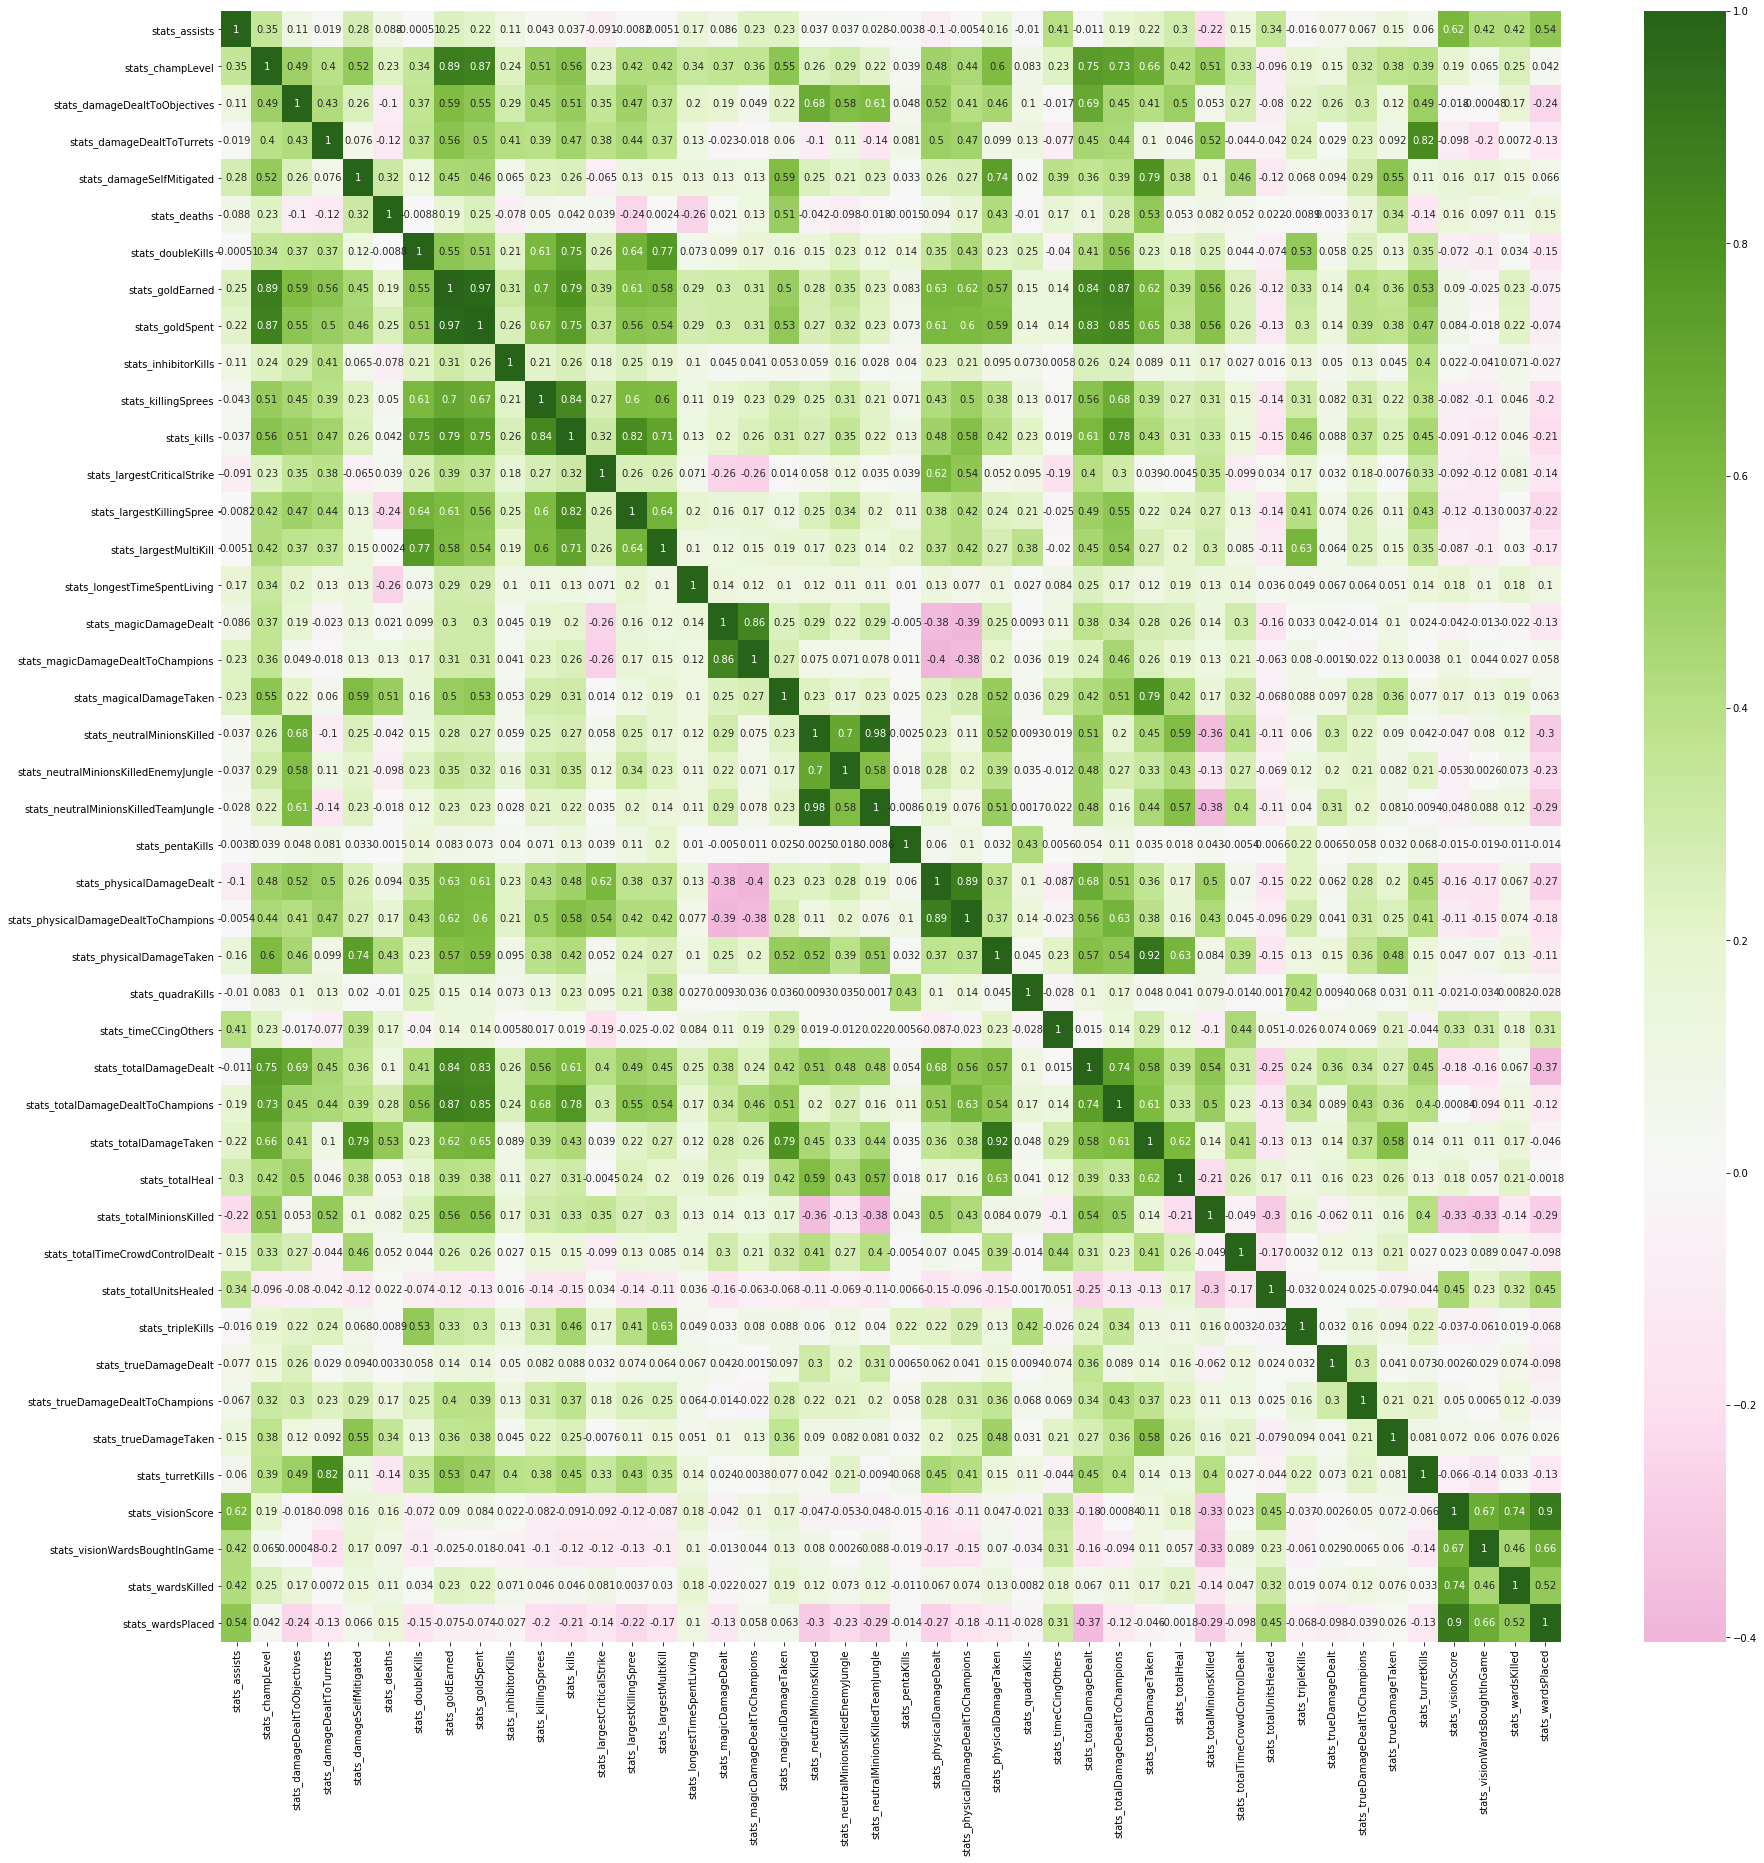

In [17]:
plt.figure(figsize=(30,30))
sn.heatmap(corr_matrix, annot=True, cmap="PiYG", center=0)
plt.savefig('plots/heatmap.png')

In [15]:
corr_matrix.unstack().dropna().drop_duplicates().sort_values(ascending=False).to_csv('correlations.csv')

### create violin-plots for all numeric fields

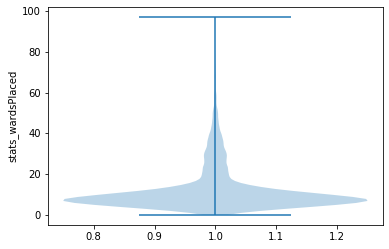

In [14]:
N = len(X)

for i in range(len(common_keys)):
    plt.clf()
    column = converted_data.loc[:,common_keys[i]].sample(n=N, ignore_index=True)
    plt.violinplot(column)
    plt.ylabel(common_keys[i])
    plt.savefig('plots/' + common_keys[i] + '.png')